**Name: Om Gurav (4351468) & Prateek Job (4354555)**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the data
titanic_data = pd.read_csv("C:/Users/omamu/OneDrive/Desktop/BA (4351468)/Sem 3/ADMN5016 Applied Artifical Intelligence & Machine Learning/train.csv")

In [3]:
# Displaying summary 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


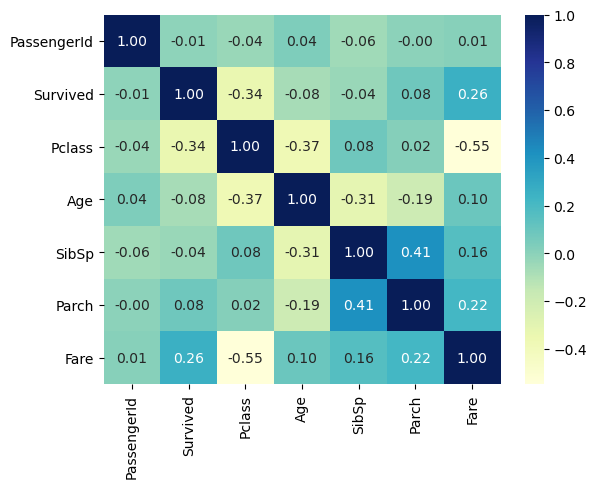

In [4]:
# Importing required libraries
import seaborn as sns

# Displaying correlation heatmap
sns.heatmap(titanic_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

In [5]:
# Importing required libraries
from sklearn.model_selection import StratifiedShuffleSplit

# Splitting the data into train and test sets in a stratified manner
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_indices]
    strat_test_set = titanic_data.loc[test_indices]

In [6]:
# Displaying the test set
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
685,686,0,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,0,3,"Sadlier, Mr. Matthew",male,NaN,0,0,367655,7.7292,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
336,337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S


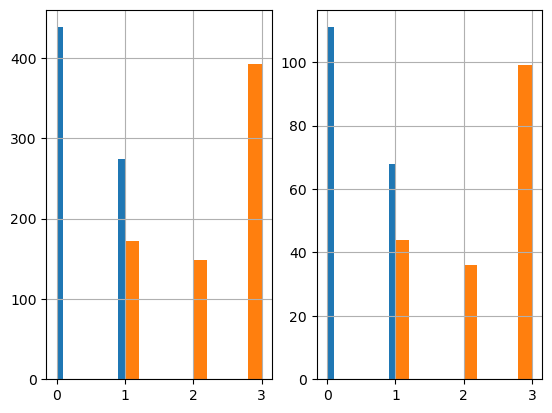

In [7]:
# Displaying histograms of 'Survived' and 'Pclass' for both train and test sets
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

plt.show()

In [8]:
# Displaying information about the training set
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 873 to 568
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          564 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [9]:
# Importing required libraries
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.impute import SimpleImputer

# Custom transformer for imputing Age column
class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [10]:
# Importing required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for encoding 'Embarked' and 'Sex' features
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X


In [11]:
# Custom transformer to drop unnecessary features
class FeatureDropper (BaseEstimator, TransformerMixin):
    def fit (self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [12]:
# Importing required libraries
from sklearn.pipeline import Pipeline

# Creating a pipeline to apply these transformations
pipeline = Pipeline ([("ageimputer", AgeImputer ()),
                      ("featureencoder", FeatureEncoder()), 
                      ("featuredropper", FeatureDropper ())])

In [13]:
# Applying the pipeline to the training set
strat_train_set = pipeline.fit_transform(strat_train_set)

In [14]:
# Displaying the transformed training set
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
873,874,0,3,47.000000,0,0,9.0000,0.0,0.0,1.0,0.0,1.0
345,346,1,2,24.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
229,230,0,3,29.990248,3,1,25.4667,0.0,0.0,1.0,1.0,0.0
653,654,1,3,29.990248,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
390,391,1,1,36.000000,1,2,120.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262,263,0,1,52.000000,1,1,79.6500,0.0,0.0,1.0,0.0,1.0
439,440,0,2,31.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
260,261,0,3,29.990248,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
702,703,0,3,18.000000,0,1,14.4542,1.0,0.0,0.0,1.0,0.0


In [15]:
# Displaying information about the transformed training set
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 873 to 568
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [16]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and labels (y)
X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

# Scaling the data
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [17]:
X_data

array([[ 1.66169648e+00,  8.27893418e-01,  1.34218513e+00, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [-3.93338301e-01, -3.70196244e-01, -4.72671335e-01, ...,
         6.07643620e-01,  1.35941164e+00, -1.35941164e+00],
       [-8.44823215e-01,  8.27893418e-01, -2.80333277e-16, ...,
         6.07643620e-01,  1.35941164e+00, -1.35941164e+00],
       ...,
       [-7.24167764e-01,  8.27893418e-01, -2.80333277e-16, ...,
        -1.64570147e+00, -7.35612358e-01,  7.35612358e-01],
       [ 9.96145442e-01,  8.27893418e-01, -9.46112150e-01, ...,
        -1.64570147e+00,  1.35941164e+00, -1.35941164e+00],
       [ 4.74602525e-01,  8.27893418e-01, -2.80333277e-16, ...,
        -1.64570147e+00, -7.35612358e-01,  7.35612358e-01]])

In [18]:
y_data

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,

In [19]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Training a RandomForestClassifier with GridSearchCV
clf = RandomForestClassifier()

# Setting up the hyperparameters for GridSearchCV
param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [20]:
# Getting the best model from GridSearchCV
final_clf = grid_search.best_estimator_

In [21]:
final_clf

RandomForestClassifier(max_depth=10)

In [22]:
# Applying the pipeline to the test set
strat_test_set = pipeline.fit_transform(strat_test_set)

In [23]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
685,686,0,2,25.000000,1,2,41.5792,1.0,0.0,0.0,0.0,1.0
191,192,0,2,19.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
51,52,0,3,21.000000,0,0,7.8000,0.0,0.0,1.0,0.0,1.0
353,354,0,3,25.000000,1,0,17.8000,0.0,0.0,1.0,0.0,1.0
876,877,0,3,20.000000,0,0,9.8458,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,389,0,3,28.604467,0,0,7.7292,0.0,1.0,0.0,0.0,1.0
704,705,0,3,26.000000,1,0,7.8542,0.0,0.0,1.0,0.0,1.0
336,337,0,1,29.000000,1,0,66.6000,0.0,0.0,1.0,0.0,1.0
458,459,1,2,50.000000,0,0,10.5000,0.0,0.0,1.0,1.0,0.0


In [24]:
# Splitting the test set into features and labels
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

# Scaling the test set
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [25]:
# Evaluating the RandomForestClassifier on the test set
final_clf.score(X_data_test, y_data_test)

0.8100558659217877

In [26]:
# Applying the pipeline to the entire data
final_data = pipeline.fit_transform(titanic_data)

In [27]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [28]:
# Splitting the final data into features and labels
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

# Scaling the final data
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [29]:
# Training another RandomForestClassifier with GridSearchCV on the entire data
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [30]:
# Getting the best model from GridSearchCV
prod_final_clf = grid_search.best_estimator_

In [31]:
prod_final_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [32]:
# Loading the final test data
titanic_test_data = pd.read_csv("C:/Users/omamu/OneDrive/Desktop/BA (4351468)/Sem 3/ADMN5016 Applied Artifical Intelligence & Machine Learning/test.csv")

In [33]:
# Applying the pipeline to the final test data
final_test_data = pipeline.fit_transform(titanic_test_data)

In [34]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [35]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [36]:
# Handling any null values in the final test data
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

# Scaling the final test data
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [37]:
# Making predictions on the final test data using the RandomForestClassifier
predictions = prod_final_clf.predict(X_data_final_test)

In [38]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [39]:
# Saving the predictions to a CSV file
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("C:/Users/omamu/OneDrive/Desktop/BA (4351468)/Sem 3/ADMN5016 Applied Artifical Intelligence & Machine Learning/predictions.csv", index=False)

In [40]:
# Displaying the predictions RandomForestClassifier
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [41]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression

In [42]:
# Training a LogisticRegression with GridSearchCV
log_clf = LogisticRegression()

# Setting up the hyperparameters for GridSearchCV for LogisticRegression
param_grid_log = [
    {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
]

grid_search_log = GridSearchCV(log_clf, param_grid_log, cv=3, scoring="accuracy", return_train_score=True)
grid_search_log.fit(X_data, y_data)

# Getting the best model from GridSearchCV
final_log_clf = grid_search_log.best_estimator_

final_log_clf

LogisticRegression(C=0.1)

In [43]:
# Evaluating the LogisticRegression on the test set
final_log_clf.score(X_data_test, y_data_test)

0.7821229050279329

In [44]:
# Training another LogisticRegression with GridSearchCV on the entire data
prod_log_clf = LogisticRegression()

grid_search_log = GridSearchCV(prod_log_clf, param_grid_log, cv=3, scoring="accuracy", return_train_score=True)
grid_search_log.fit(X_data_final, y_data_final)

# Getting the best model from GridSearchCV
prod_final_log_clf = grid_search_log.best_estimator_

prod_final_log_clf

LogisticRegression(C=0.01)

In [45]:
# Making predictions on the final test data using the LogisticRegression
predictions_log = prod_final_log_clf.predict(X_data_final_test)

predictions_log

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
# Saving the predictions to a CSV file
final_log_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_log_df['Survived'] = predictions_log
final_log_df.to_csv("C:/Users/omamu/OneDrive/Desktop/BA (4351468)/Sem 3/ADMN5016 Applied Artifical Intelligence & Machine Learning/predictions_log.csv", index=False)

In [47]:
# Displaying the predictions LogisticRegression
final_log_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
